----
## <font color="00295C"> **MVP**: Análise Exploratória e Pré-Processamento de Dados </font>

**Dados do Aluno**


* **Nome**: Denilson Santos
* **Disciplina**: Análise Exploratória e Pré-Processamento de Dados
* **Pós-Graduação**: Ciência de dados e Analytics
----

# <font color="00295C">1. Origem dos Dados

O Dataset utilizado é referente aos Aluguéis de imóveis no Brasil. O dataset utilizado foi encontrado no site do kaggle, no seguinte endereço:


https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?resource=download


<font color="00295C"> **Dados Utilizados** </font>

* **city**: Cidade onde o imóvel está localizado
* **area**: Área total do imóvel
* **rooms**: Quantidade de Quartos
* **bathroom**: Quantidade de Banheiros
* **parking_spaces**: Quantidade de Vagas de Estacionamento
* **floor**: Quantidade de pisos (andar) do imóvel
* **animal**: Se aceita pets ou não
* **furniture**: Se o imóvel está com móbilias ou não
* **hoa_brl**: é uma taxa que proprietários pagam para custear a manutenção de áreas comuns dos condomínios.
* **rent_amount**: Valor do Aluguel
* **property_tax**: Contribuição predial
* **fire_insurance**: Taxa de Incêndio
* **total**: Valor total do Aluguel

# <font color="00295C"> 2. Definição do Problema </font>

A diretoria da Imobiliária Luxor soliciotu que a equipe dados faça uma análise dos Alguéis no Brasil, com foco na cidade do Rio de Janeiro para futura expansão da empresa.

A equipe decidiu fazer uma análise exploratória dos dados e depois Utilizar alguns modelos de Machine Learning para avaliar qual seria melhor solução. Serão utilizados os seguintes modelos:

- Regresão Linear
- Regressão Logística
- Árvore de Decisão
- Redes Neurais

# <font color="00295C"> 3. Preparação dos Dados </font>

Nesta etapa, iremos importar as bibliotecas necessárias e importar o Dataset que será utilizado.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
import statsmodels.api as sm

from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  KFold
from sklearn.metrics import mean_squared_error, r2_score

from tabulate import tabulate
from datetime import datetime
from csv import DictReader

from google.colab import data_table
data_table.enable_dataframe_formatter()

Importação dos Dados

In [2]:
# Dataset:
url = "https://raw.githubusercontent.com/CITMAX/data/main/houses_to_rent_complete.csv"
df = pd.read_csv(url, sep=',', on_bad_lines='warn')

Realizando a leitura e teste dos dados

In [3]:
df

city  area  rooms  bathroom  parking spaces floor     animal  \
0           São Paulo    70      2         1               1     7      acept   
1           São Paulo   320      4         4               0    20      acept   
2        Porto Alegre    80      1         1               1     6      acept   
3        Porto Alegre    51      2         1               0     2      acept   
4           São Paulo    25      1         1               0     1  not acept   
...               ...   ...    ...       ...             ...   ...        ...   
10687    Porto Alegre    63      2         1               1     5  not acept   
10688       São Paulo   285      4         4               4    17      acept   
10689  Rio de Janeiro    70      3         3               0     8  not acept   
10690  Rio de Janeiro   120      2         2               2     8      acept   
10691       São Paulo    80      2         1               0     -      acept   

           furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0          furnished      2065              3300                211   
1      not furnished      1200              4960               1750   
2      not furnished      1000              2800                  0   
3      not furnished       270              1112                 22   
4      not furnished         0               800                 25   
...              ...       ...               ...                ...   
10687      furnished       402              1478                 24   
10688  not furnished      3100             15000                973   
10689      furnished       980              6000                332   
10690      furnished      1585             12000                279   
10691  not furnished         0              1400                165   

       fire insurance (R$)  total (R$)  
0                       42        5618  
1                       63        7973  
2                       41        3841  
3                       17        1421  
4                       11         836  
...                    ...         ...  
10687                   22        1926  
10688                  191       19260  
10689                   78        7390  
10690                  155       14020  
10691                   22        1587  

[10692 rows x 13 columns]

# <font color="00295C"> 4 - Análise Exploratória </font>

Neste tópico, iremos explorar os dados, utilizando algumas análises.

In [4]:
# Filtrar apenas pela cidade do Rio de Janeiro
df = df[df['city'] == 'Rio de Janeiro']

**<font color="004DA7"> 4.1. Visualização da Distribuição dos Valores de Aluguel**

Um histograma pode ajudar a visualizar a distribuição do valor do aluguel.

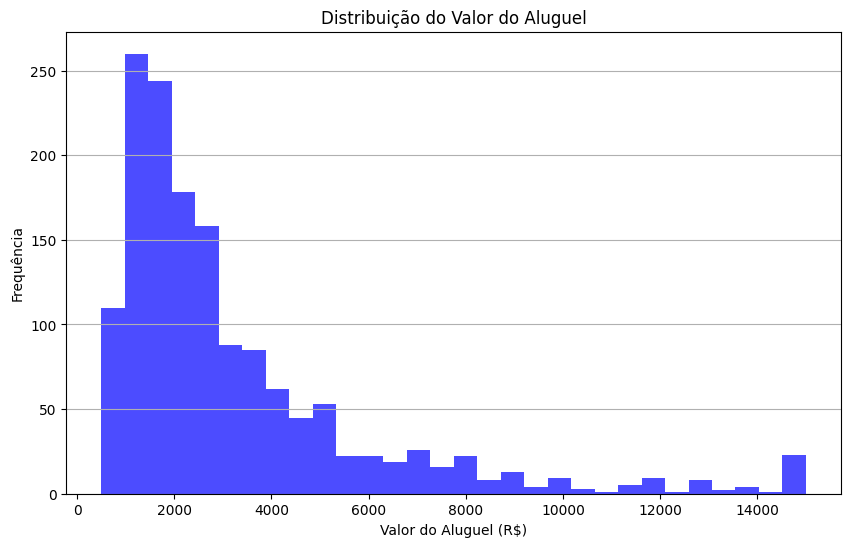

In [5]:
import matplotlib.pyplot as plt

# Histograma do valor do aluguel
plt.figure(figsize=(10, 6))
plt.hist(df['rent amount (R$)'], bins=30, color='blue', alpha=0.7)
plt.title('Distribuição do Valor do Aluguel')
plt.xlabel('Valor do Aluguel (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

**<font color="004DA7"> 4.2. Gráfico de Boxplot para Analisar Outliers </font>**

Um boxplot pode ser utilizado para identificar outliers nos valores de aluguel.

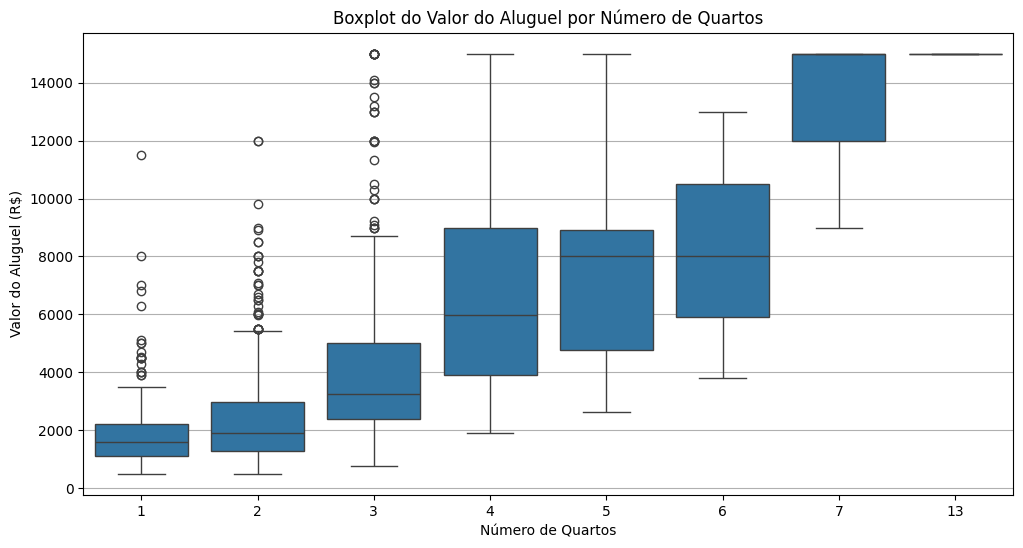

In [6]:
import seaborn as sns

# Boxplot do valor do aluguel por número de quartos
plt.figure(figsize=(12, 6))
sns.boxplot(x='rooms', y='rent amount (R$)', data=df)
plt.title('Boxplot do Valor do Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do Aluguel (R$)')
plt.grid(axis='y')
plt.show()

**<font color="004DA7"> 4.3. Matriz de Correlação**

A matriz de correlação ajuda a entender como as variáveis estão relacionadas entre si.

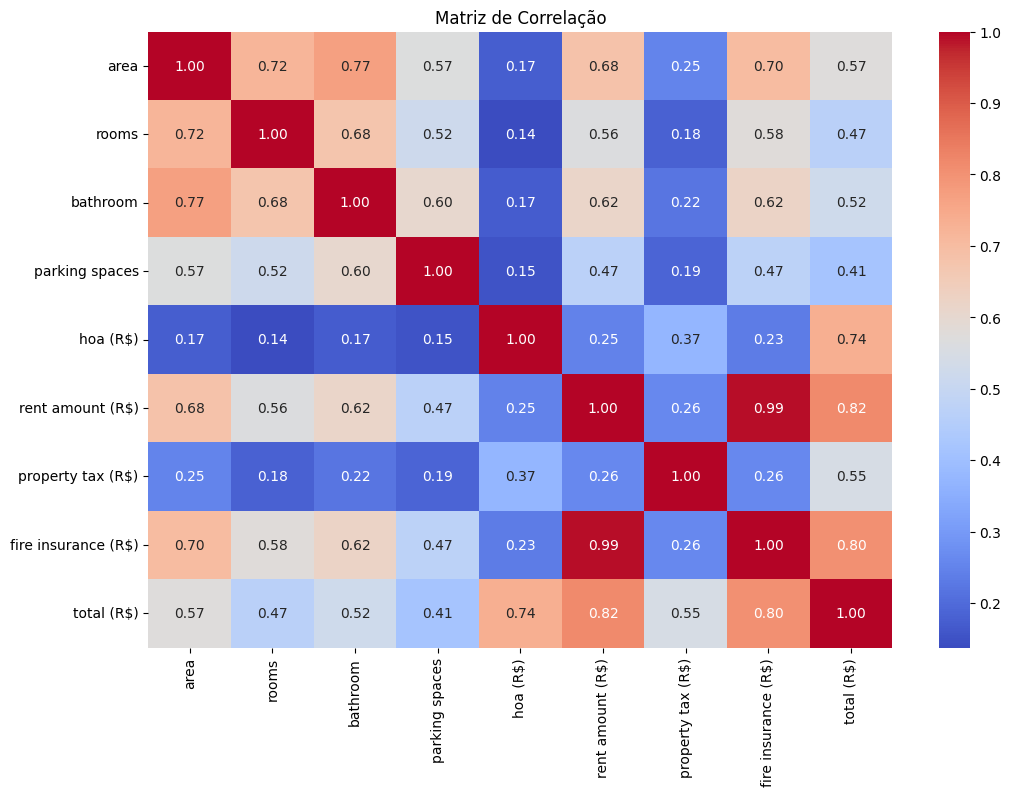

In [7]:
# Matriz de correlação apenas com colunas numéricas
correlation_matrix = df.corr(numeric_only=True)

# Gráfico de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**<font color="004DA7"> 4.4. Análise da Relação entre Área e Valor do Aluguel**

Um gráfico de dispersão pode ser útil para visualizar a relação entre a área e o valor do aluguel.

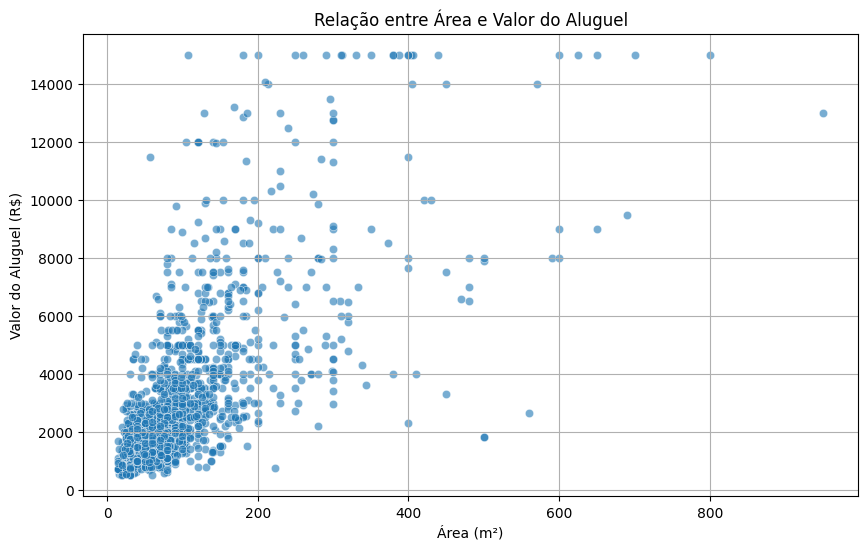

In [8]:
# Gráfico de dispersão entre área e valor do aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='rent amount (R$)', data=df, alpha=0.6)
plt.title('Relação entre Área e Valor do Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.grid()
plt.show()

**<font color="004DA7"> 4.5. Análise da Taxa de Manutenção em Relação ao Valor do Aluguel**

Verificar como a taxa de manutenção (hoa_brl) se relaciona com o valor do aluguel.

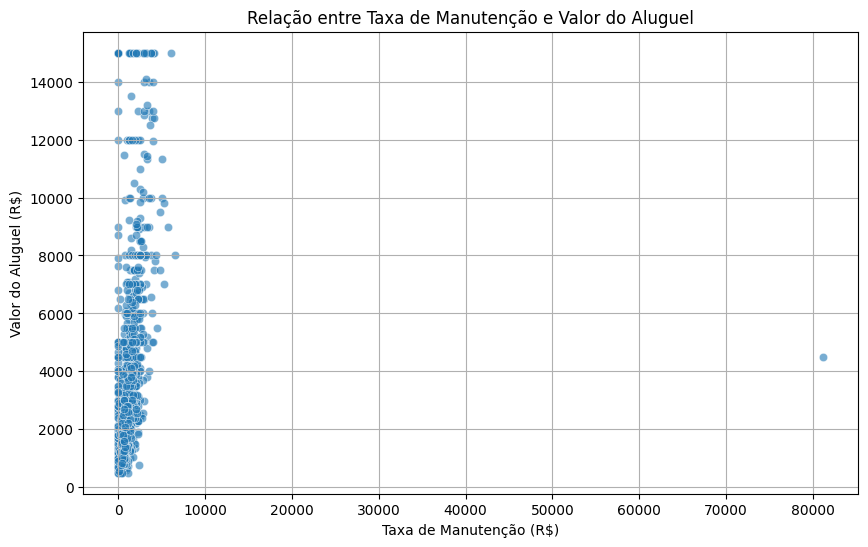

In [9]:
# Gráfico de dispersão entre hoa_brl e valor do aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hoa (R$)', y='rent amount (R$)', data=df, alpha=0.6)
plt.title('Relação entre Taxa de Manutenção e Valor do Aluguel')
plt.xlabel('Taxa de Manutenção (R$)')
plt.ylabel('Valor do Aluguel (R$)')
plt.grid()
plt.show()

# <font color="00295C"> 5. Modelos Supervisionados


**5.1 Tratamento dos Dados**

Nesta etapa, realizar o tratamento dos dados

In [10]:
# Filtrar apenas pela cidade do Rio de Janeiro
df = df[df['city'] == 'Rio de Janeiro']

In [11]:
# Verificar a distribuição de valores nulos
print(f"Valores Nulos: {df.isnull().sum()}")

Valores Nulos: city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64


In [12]:
# Verificar a presença de valores duplicados
print(f"Valores Duplicados: {df.duplicated().sum()}")

Valores Duplicados: 70


In [13]:
# Remover duplicatas com base em colunas específicas
df = df.drop_duplicates(subset=['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)'])

print(f"Valores Duplicados Após Remoção: {df.duplicated().sum()}")

print(f"Número de linhas antes da filtragem: {len(df)}")
df = df[df['hoa (R$)'] <= 1.5 * df['rent amount (R$)']]
print(f"Número de linhas após a filtragem: {len(df)}")

Valores Duplicados Após Remoção: 0
Número de linhas antes da filtragem: 1424
Número de linhas após a filtragem: 1419


In [14]:
# Remover linhas onde a coluna 'floor' contém "-"
df = df[df['floor'] != '-']

In [15]:
# Tratar a coluna 'floor' e converter para int
df.loc[:, 'floor'] = df['floor'].astype(int)

In [16]:
# Converter variáveis categóricas usando .loc
df.loc[:, 'animal'] = df['animal'].map({'acept': 1, 'not acept': 0})
df.loc[:, 'furniture'] = df['furniture'].map({'furnished': 1, 'not furnished': 0})

In [17]:
print(df.columns.tolist())

['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [18]:
# Remover a coluna 'city'
df = df.drop(columns=['city'])

In [19]:
# Atualizar a variável X com as características do imóvel
X = df[['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'furniture', 'animal']]
y = df['rent amount (R$)']

## <font color="00295C">5.1 Modelos Supervisionados | <font color="99B41A"> Regressão Linear

O Objetivo do modelo de Regressão Linear é gerar uma ferramenta precisa e confiável para prever os preços dos alguéis com base nos dados dos imóveis.

<font color="99B41A">**Variáveis**

Foram selecionadas as seguintes varáiveis:
- rooms
- bathroom
- furniture
- animal
- fire insurance
- rent amount

As variáiveis foram escolhidas através da análise de correlação (Matriz de Correlação)


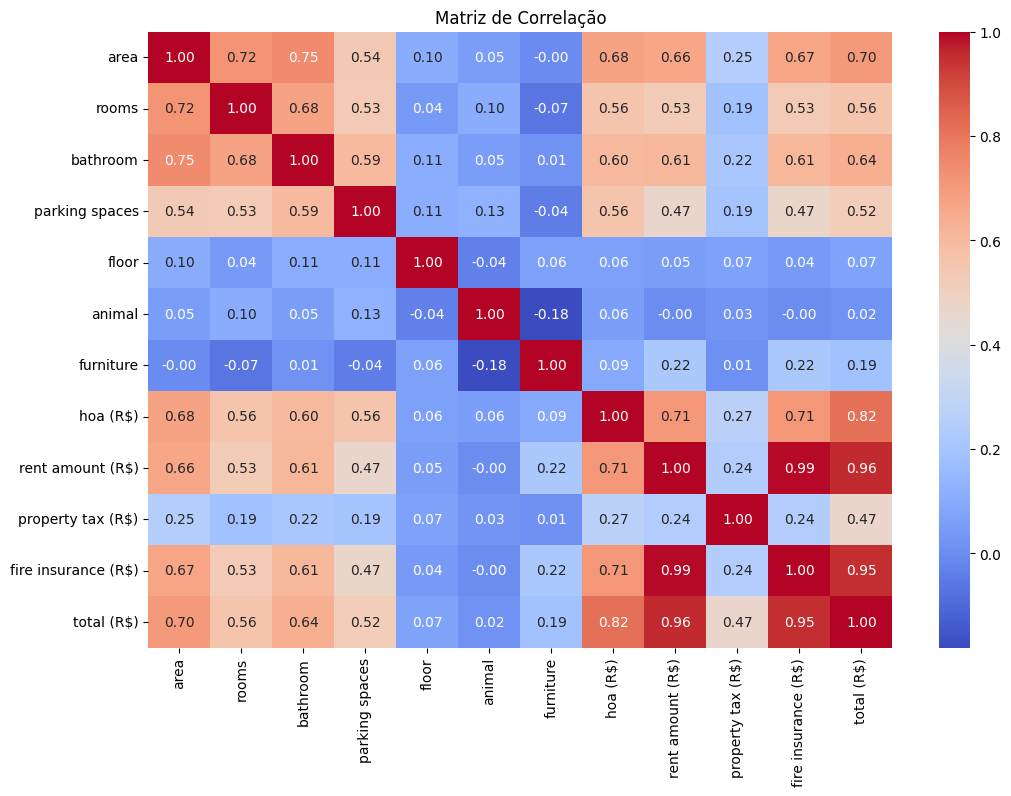

In [20]:
# Análise exploratória: matriz de correlação e gráfico de calor
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

<font color="99B41A">**Tranformações Aplicadas**

- Remoção de Outliers
- Retirada de dados Duplicados
- Valores nulos
- Conversão de variáveis Categóricas
- Conversão do campo floor para inteiro
- Filtrar apenas a Cidade do Rio de Janeiro

In [21]:
# Adicionar constante
X = sm.add_constant(X)

In [22]:
import pandas as pd

# Exemplo de DataFrame com colunas booleanas
data = {
    'furniture_1': [True, False, True],
    'animal_1': [False, True, True]
}
df = pd.DataFrame(data)

# Convertendo colunas booleanas para inteiros
df['furniture_1'] = df['furniture_1'].astype(int)
df['animal_1'] = df['animal_1'].astype(int)

print(df)

   furniture_1  animal_1
0            1         0
1            0         1
2            1         1


In [23]:
# Convertendo colunas booleanas para inteiros
df['furniture_1'] = df['furniture_1'].astype(int)
df['animal_1'] = df['animal_1'].astype(int)

In [24]:
print(X.dtypes)
print(y.dtypes)

const                  float64
area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
hoa (R$)                 int64
property tax (R$)        int64
fire insurance (R$)      int64
furniture               object
animal                  object
dtype: object
int64


In [25]:
# Exemplo de codificação one-hot
X = pd.get_dummies(X, drop_first=True)

In [26]:
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [27]:
X = X.dropna()
y = y[X.index]  # Certifique-se de que y corresponda às linhas de X

In [28]:
# Verificando os tipos de dados
print("Tipos de dados antes da conversão:")
print(X.dtypes)

# Convertendo as colunas booleanas para inteiros
X['furniture_1'] = X['furniture_1'].astype(int)
X['animal_1'] = X['animal_1'].astype(int)

# Verificando novamente os tipos de dados
print("Tipos de dados após a conversão:")
print(X.dtypes)

# Verificando valores nulos
print("Valores nulos em X:")
print(X.isnull().sum())
print("Valores nulos em y:")
print(y.isnull().sum())

# Removendo valores nulos (se houver)
X = X.dropna()
y = y[X.index]  # Certifique-se de que y corresponda às linhas de X

# Convertendo todos os dados para numérico novamente
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Verificando a dimensão dos dados
print("Dimensões após remoção de nulos:")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Ajustando o modelo OLS novamente
model_updated = sm.OLS(y, X).fit()
print(model_updated.summary())

Tipos de dados antes da conversão:
const                  float64
area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
hoa (R$)                 int64
property tax (R$)        int64
fire insurance (R$)      int64
furniture_1               bool
animal_1                  bool
dtype: object
Tipos de dados após a conversão:
const                  float64
area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
hoa (R$)                 int64
property tax (R$)        int64
fire insurance (R$)      int64
furniture_1              int64
animal_1                 int64
dtype: object
Valores nulos em X:
const                  0
area                   0
rooms                  0
bathroom               0
parking spaces         0
hoa (R$)               0
property tax (R$)      0
fire insurance (R$)    0
furniture_1            0
animal_1               0
dtype: int64
V

<font color="99B41A">**Treinamento do Modelo em Reegressão Linear**


In [29]:
# Treinar o modelo com os dados atualizados
model_updated = sm.OLS(y, X).fit()

In [30]:
# Exibir o sumário do modelo treinado
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.439e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:50:42   Log-Likelihood:                -9312.8
No. Observations:                1327   AIC:                         1.865e+04
Df Residuals:                    1317   BIC:                         1.870e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -20.8752    

Dividir o modelo em 2: Treino e Teste

In [31]:
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test_pred = train_test_split(X, y, test_size=0.2, random_state=42)

Treinamento do Modelo

In [32]:
# Treinar o modelo nos dados de treino
model_train = sm.OLS(y_train, X_train).fit()

In [33]:
# Prever os valores usando o modelo nos dados de teste
y_pred_lin = model_train.predict(X_test)

In [34]:
# Avaliar o desempenho do modelo
print("Métricas de Avaliação no Conjunto de Teste:")
print("------------------------------------------")
print(f"R²: {r2_score(y_test_pred, y_pred_lin)}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test_pred, y_pred_lin))}")


Métricas de Avaliação no Conjunto de Teste:
------------------------------------------
R²: 0.9964292251696865
RMSE (Root Mean Squared Error): 183.07036593310204


In [35]:
# Resumo do modelo treinado nos dados de treino
print("\nSumário do Modelo Treinado nos Dados de Treino:")
print(model_train.summary())


Sumário do Modelo Treinado nos Dados de Treino:
                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     9113.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:50:42   Log-Likelihood:                -7523.4
No. Observations:                1061   AIC:                         1.507e+04
Df Residuals:                    1051   BIC:                         1.512e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [36]:
# Validação cruzada com 5 folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo nos dados de treino do fold atual
    model_cv = sm.OLS(y_train_cv, X_train_cv).fit()

    # Prever nos dados de teste do fold atual
    y_pred_cv = model_cv.predict(X_test_cv)

    # Calcular R² e armazenar na lista de scores
    r2_cv = r2_score(y_test_cv, y_pred_cv)
    cv_scores.append(r2_cv)

In [37]:
# Média e desvio padrão dos scores de R²
mean_r2_cv = np.mean(cv_scores)
std_r2_cv = np.std(cv_scores)

print(f"Resultados da Validação Cruzada com {num_folds} folds:")
print("----------------------------------------------")
print(f"R² Médio: {mean_r2_cv}")
print(f"Desvio Padrão de R²: {std_r2_cv}")

Resultados da Validação Cruzada com 5 folds:
----------------------------------------------
R² Médio: 0.9885530610899419
Desvio Padrão de R²: 0.011854881427007795


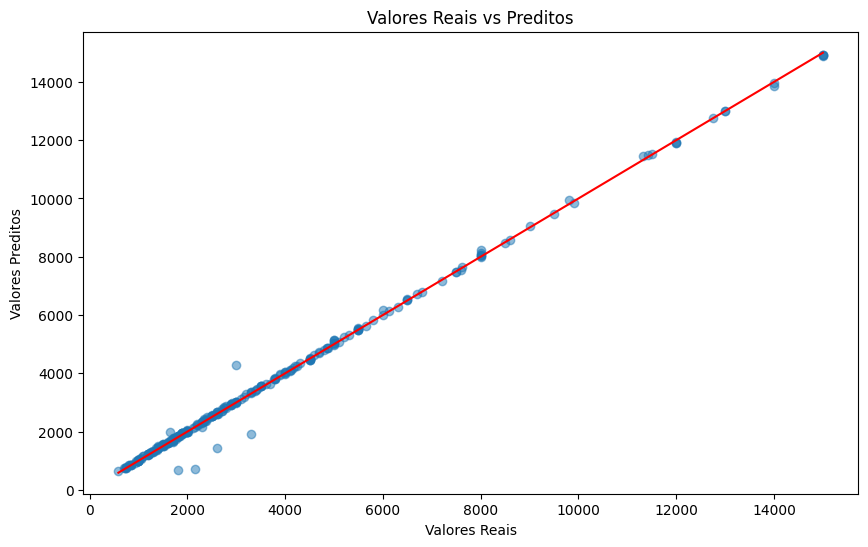

In [38]:
# Visualizar dados reais vs preditivos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_pred_lin, alpha=0.5)
plt.plot([min(y_test_pred), max(y_test_pred)], [min(y_test_pred), max(y_test_pred)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.show()

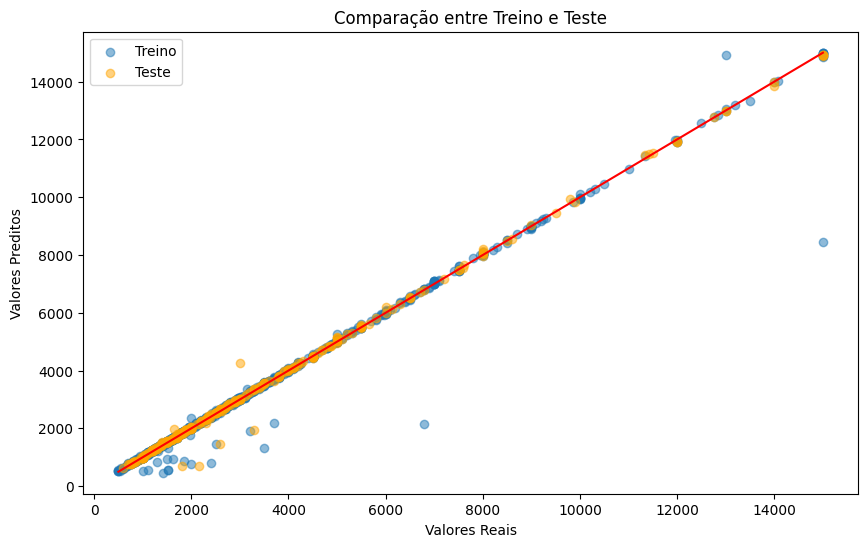

In [39]:
# Comparação entre o conjunto de treino e teste
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model_train.predict(X_train), alpha=0.5, label='Treino')
plt.scatter(y_test_pred, y_pred_lin, alpha=0.5, label='Teste', color='orange')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Treino e Teste')
plt.legend()
plt.show()

<font color="99B41A">**Simulação**

Nesta etapa será realizada uma simulação de um Aluguel

In [40]:
# Simulação de um novo imóvel
new_data = {
    'const': 1,
    'area': 200,
    'rooms': 4,
    'bathroom': 3,
    'parking spaces': 3,
    'hoa (R$)': 2400,
    'property tax (R$)': 0,
    'fire insurance (R$)': 82,
    'furniture': 0,
    'animal': 0
}

In [41]:
# Criar um DataFrame com essas características
new_df = pd.DataFrame([new_data])


In [42]:
# Fazer a previsão usando o modelo treinado
predicted_total_rent = model_updated.predict(new_df)

# Exibir o valor previsto
print(f"Valor previsto do aluguel total: R$ {predicted_total_rent.values[0]:,.2f}")

Valor previsto do aluguel total: R$ 6,343.94


<font color="99B41A">**Treinamento**

- Modelo foi dividido em dois conjuntos, sendo um de 80% Treino e outro 20% Teste.
- Foi utilizado a função `SKLEARN` | `train_test_split`
- Foi utilizado a função `OLS Stats Models` para treinar o modelo
- Foi utilizado a validação cruzada com 5 folds para verificar a estabulidade do modelo
- Foi utilizado a Média do Coeficiente de Determinação (R2) para avaliar o desempenho

Na Validação Cruzada o resultado foi de 0.98 no conjunto de teste, representando 98,0% da variabilidade dos preços dos aluguéis.

Resultados da Validação Cruzada com 5 folds:
- **R² Médio**: `0.9885530610899419`
- **Desvio Padrão de R²**: `0.011854881427007795`


<font color="99B41A">**Resultado Final**

O Modelo utilizado conseguiu interpretar e prever os dados. Sendo assim, os algorítmos de Regressão Linear são úteis para a previsão dos preços dos Alguéis.

## <font color="00295C">5.2 Modelos Supervisionados | <font color="2288ff"> Regressão Logística

O Objetivo da Regressão Logística é prever se o Valor do Aluguel de um imóvel na Cidade do Rio de Janeiro é "*Caro*" ou "*Barato*" com base nos dados do Imóvel.

<font color="2288ff">**Variáveis**

Foram selecionadas as seguintes varáiveis:

- Area
- Rooms
- Bathroom
- Parking Spaces
- HOA (R$)
- Fire insurance
- Property Tax

<font color="2288ff">**Tranformações**

- Inclusão de uma constante
- Criação de uma variável binária para classificar o Aluguel como Caro ou Barato
- Outliers já tratados e retirados


Importando as Bibliotecas

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

In [44]:
# Dataset:
url = "https://raw.githubusercontent.com/CITMAX/data/main/houses_to_rent_complete.csv"
df = pd.read_csv(url, sep=',', on_bad_lines='warn')

In [45]:
# Remover duplicatas com base em colunas específicas
df = df.drop_duplicates(subset=['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)'])

In [46]:
# Filtrar apenas pela cidade do Rio de Janeiro
df = df[df['city'] == 'Rio de Janeiro']

In [47]:
# Adicionar variável binária 'rent_category' com base na média do 'rent amount'
rent_mean = df['rent amount (R$)'].mean()
df['rent_category'] = np.where(df['rent amount (R$)'] >= rent_mean, 1, 0)

In [48]:
# Atualizar a variável X com as características do imóvel
X = df[['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']]
y = df['rent_category']

In [49]:
# Adicionar constante
X = sm.add_constant(X)

In [50]:
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Treinar o modelo de regressão logística com validação cruzada
logistic_cv = LogisticRegressionCV(cv=5, max_iter=10000, random_state=42)
logistic_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=10000, random_state=42)

In [52]:
# Avaliar o modelo nos dados de teste
y_pred = logistic_cv.predict(X_test)


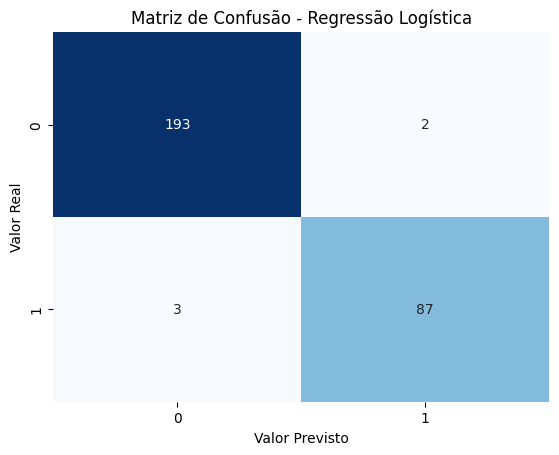

In [53]:
# Exibir matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [54]:
print(f"Matriz de Confusão")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão
[[193   2]
 [  3  87]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.98      0.97      0.97        90

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



In [55]:
y_test_log = y_test
y_pred_log = y_pred

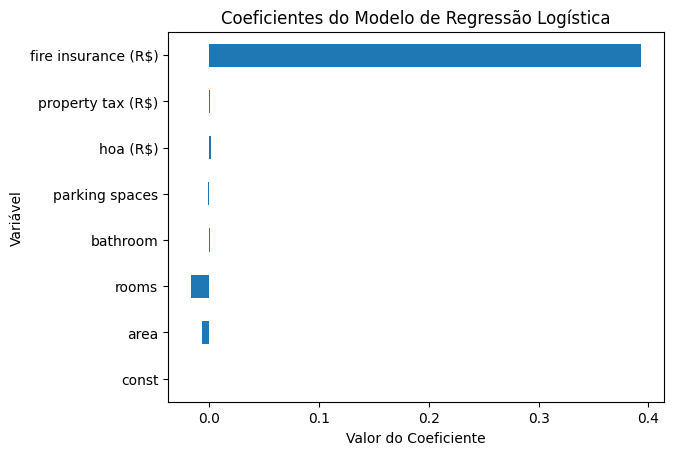

Coeficientes
                     Coeficiente
const                  -0.000394
area                   -0.007112
rooms                  -0.017228
bathroom                0.000550
parking spaces         -0.000940
hoa (R$)                0.001048
property tax (R$)       0.000920
fire insurance (R$)     0.393810


In [56]:
# Exibir coeficientes do modelo
coefficients = pd.DataFrame(logistic_cv.coef_.T, index=X.columns, columns=['Coeficiente'])
coefficients.plot(kind='barh', legend=False)
plt.title('Coeficientes do Modelo de Regressão Logística')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Variável')
plt.show()

print("Coeficientes")
print(coefficients)

In [57]:
# Simulação de um novo imóvel
new_data = {
    'const': 1,
    'area': 200,
    'rooms': 4,
    'bathroom': 3,
    'parking spaces': 3,
    'hoa (R$)': 2400,
    'property tax (R$)': 0,
    'fire insurance (R$)': 82
}

In [58]:
# Criar um DataFrame com essas características
new_df = pd.DataFrame([new_data])

In [59]:
# Fazer a previsão usando o modelo treinado
predicted_category = logistic_cv.predict(new_df)
predicted_category_label = 'Caro' if predicted_category[0] == 1 else 'Barato'

In [60]:
# Exibir a categoria prevista
print(f"Previsão da categoria de aluguel do novo imóvel: {predicted_category_label}")

Previsão da categoria de aluguel do novo imóvel: Caro


<font color="2288ff">**Treinamento**


O modelo foi treinado utilizando `LogisticRegressionCV` com validação cruzada de 5 dobras. Os Hiperparâmetros foram ajustados automaticamente durante o treinamento.

<font color="2288ff"> **Validação Cruzada**

O modelo foi treinando 5 vezes (cv=5), cada vez utilizando 4 partes para treino e uma para validação, permitindo assim que o modelo seja avaliado em diferentes subconjuntos de dados.

<font color="2288ff"> **Resultado**

A Qualidade do Modelo foi avaliada utilizando a Matriz de Confusão e a classificação. Os Resultados indicaram uma grande precisão indicando que o modelo é capaz em prever corretamente se um aluguel é **caro** ou **barato**.

> Previsão da categoria de aluguel do novo imóvel: `Caro`

- A acurácia geral de 98% sugere que o modelo é confiável e pode ser utilizado pela Diretoria no plano de expansão e tomada de decisão sobre os preços dos alguéis
- A alta precisão para as duas categorias (Barato ou Caro) significa que o modelo é equilibrado e eficaz e pode ser utilizado para auxiliar os Corretores.

## <font color="00295C">5.2 Modelos Supervisionados | <font color="F08000"> Árvore de Decisão

O objetivo do Modelo é Classificar os valores de alguéis em três categorias: **baixo**, **médio** e **alto**. Essas categorias são definidas com base nos percentuais do valor do Aluguel.

Essa solução é destinada para:
- **Proprietários**
- **Corretores**
- **Investidores**

<font color="F08000"> **Variáveis**

As variáveis utilizadas foram:
- Area
- Rooms
- Bathrooms
- Parking Spaces
- HOA
- Property Tax
- Fire Insurance

<font color="F08000"> **Transformações**
- Remoção de Duplicatas
- Filtro por Cidade (Rio de Janeiro)
- Criação de Variável categórica para classificação do valor do alguel


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
# Dataset:
url = "https://raw.githubusercontent.com/CITMAX/data/main/houses_to_rent_complete.csv"
df = pd.read_csv(url, sep=',', on_bad_lines='warn')

In [63]:
# Remover duplicatas com base em colunas específicas
df = df.drop_duplicates(subset=['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)'])

In [64]:
# Filtrar apenas pela cidade do Rio de Janeiro
df = df[df['city'] == 'Rio de Janeiro']

In [65]:
# Adicionar variável categórica 'rent_category' com base nos percentis do 'rent amount'
percentile_33 = df['rent amount (R$)'].quantile(0.33)
percentile_66 = df['rent amount (R$)'].quantile(0.66)

def categorize_rent(rent):
    if rent <= percentile_33:
        return 0  # baixo
    elif rent <= percentile_66:
        return 1  # médio
    else:
        return 2  # alto

df['rent_category'] = df['rent amount (R$)'].apply(categorize_rent)

In [66]:
# Atualizar a variável X com as características do imóvel
X = df[['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']]
y = df['rent_category']

In [67]:
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Definir a grade de parâmetros para busca
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']
}

In [69]:
# Inicializar o modelo de árvore de decisão
dt_clf = DecisionTreeClassifier(random_state=42)

In [70]:
# Aplicar o GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 10, 20, 30]},
             verbose=2)

In [71]:
# Extrair os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [72]:
# Treinar o modelo de árvore de decisão com os melhores hiperparâmetros
best_dt_clf = grid_search.best_estimator_

In [73]:
# Avaliar o modelo nos dados de teste
y_pred = best_dt_clf.predict(X_test)

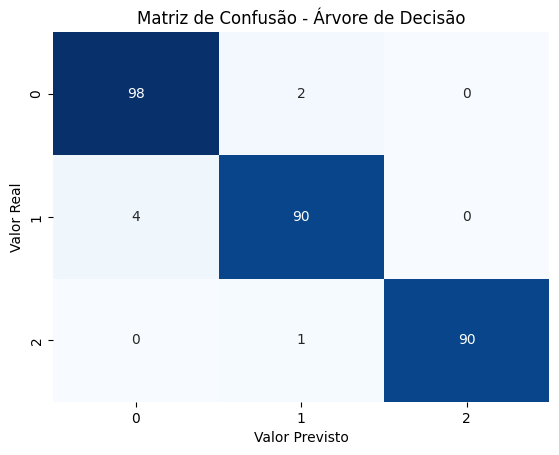

Matriz de Confusão
[[98  2  0]
 [ 4 90  0]
 [ 0  1 90]]

Relatório de Classificação:
              precision    recall  f1-score   support

       Baixo       0.96      0.98      0.97       100
       Médio       0.97      0.96      0.96        94
        Alto       1.00      0.99      0.99        91

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



In [74]:
# Exibir matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

print(f"Matriz de Confusão")
print(confusion_matrix(y_test, y_pred))

y_test_tree = y_test
y_pred_tree = y_pred

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Baixo', 'Médio', 'Alto']))

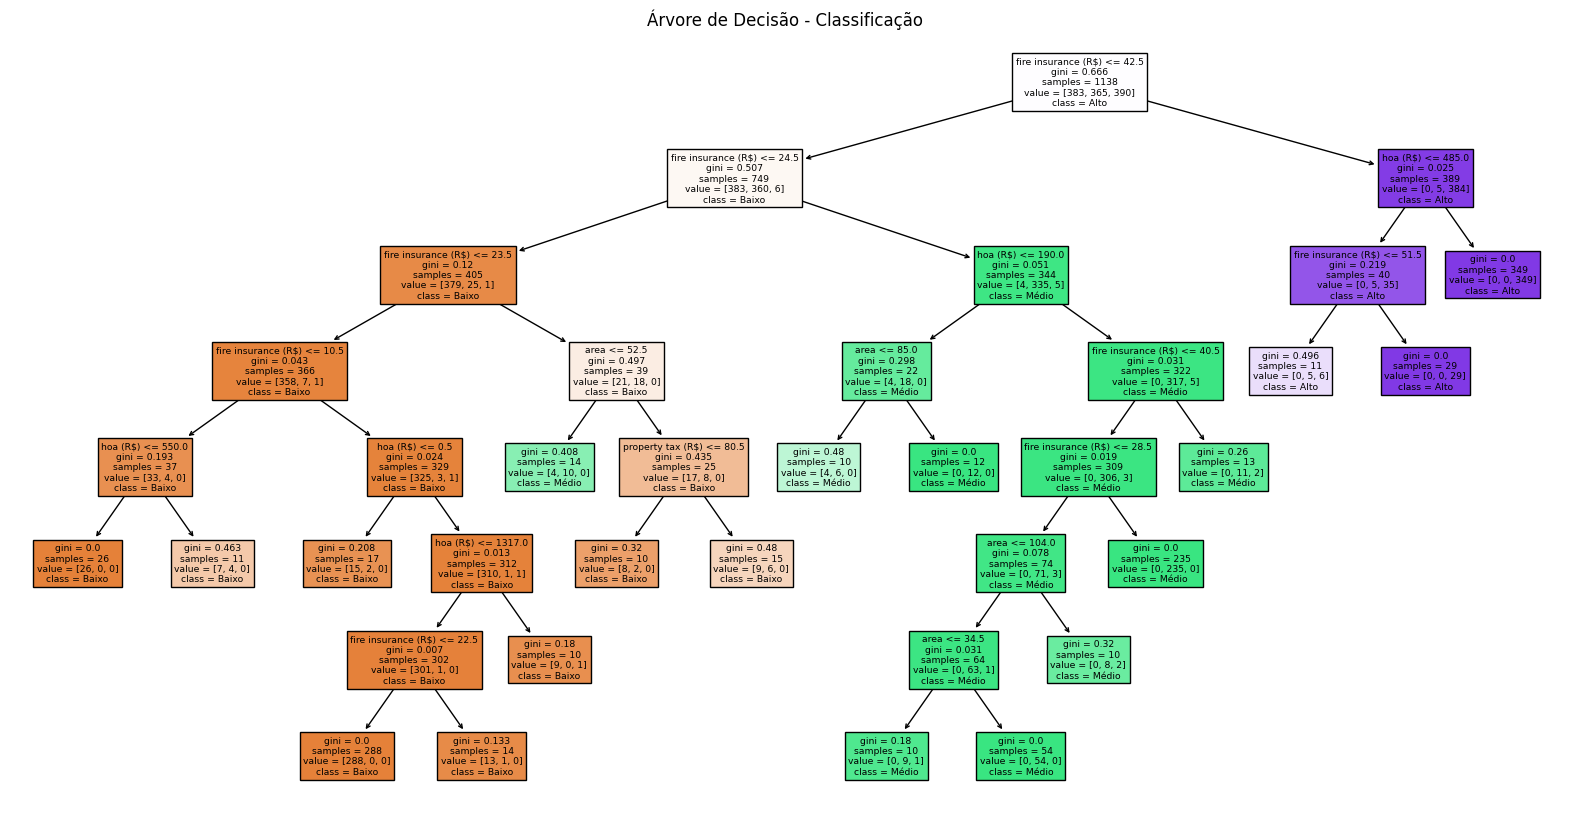

Coeficientes
area                   0.007440
rooms                  0.000000
bathroom               0.000000
parking spaces         0.000000
hoa (R$)               0.007056
property tax (R$)      0.000675
fire insurance (R$)    0.984829
dtype: float64


In [75]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(best_dt_clf, feature_names=X.columns, class_names=['Baixo', 'Médio', 'Alto'], filled=True)
plt.title('Árvore de Decisão - Classificação')
plt.show()

print("Coeficientes")
print(pd.Series(best_dt_clf.feature_importances_, index=X.columns))

In [76]:
# Simulação de um novo imóvel
new_data = {
    'area': 200,
    'rooms': 4,
    'bathroom': 3,
    'parking spaces': 3,
    'hoa (R$)': 2400,
    'property tax (R$)': 0,
    'fire insurance (R$)': 82
}

In [77]:
# Criar um DataFrame com essas características
new_df = pd.DataFrame([new_data])

In [78]:
# Fazer a previsão usando o modelo treinado
predicted_category = best_dt_clf.predict(new_df)
predicted_category_label = ['Baixo', 'Médio', 'Alto'][predicted_category[0]]

In [79]:
# Exibir a categoria prevista
print(f"Previsão da categoria de aluguel do novo Imóvel: {predicted_category_label}")

Previsão da categoria de aluguel do novo Imóvel: Alto


<font color="F08000">**Treinamento**


O modelo foi treinado utilizando `GridSearchCV` para encontrar os melhores hiperparâmetros.

<font color="F08000"> **Grade de Parâmetros**

Foi definida uma grade de parâmetros com várias combinações

<font color="F08000"> **Validação Cruzada**

O `GridSearchCV` utilizou validação cruazada (cv=5) para garantir a gereralização dos dados de teste.

<font color="F08000"> **Hiperparâmetros**

Os melhores hiperparâmetros foram:
- **criterion**: gini
- **max_depth**: none
- **max_features**: nome
- **min_samples_leaf**: 5
- **min_samples_split**: 2


<font color="F08000"> **Figura de Mérito da Árvore de Decisão**

A Matriz de Confusão apresentou os valores Reais x Previstos para cada categoria:
- **Baixo**: 98 corretos, 2 incorretos (médio)
- **Médio**: 90 corretos, 4 incorretos (baixo)
- **Alto**: 90 corretos, 1 incorretos (médio)

<font color="F08000"> **Classificação da Árvore**

- **Precisão**: Alta precisão em todas categorias
- **Recall**: Alta revocação em todas as categorias
- **F1-Score**: Valores de F1-Score indicando um equilíbrio

**Relatório de Classificação**:

              precision    recall  f1-score   support

       Baixo       0.96      0.98      0.97       100
       Médio       0.97      0.96      0.96        94
        Alto       1.00      0.99      0.99        91

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285




<font color="F08000"> **Resultado**

A Árvore de decisão permite entender como as decisões são tomadas de acordo com as varáveis de entrada, facilitando os Investidores, Proprietários e corretores compreenderem o processo de classificação dos Aluguéis.

Durante a simulação de um novo imóvel, foi feita uma previsão onde o resultado foi:
`Previsão da categoria de aluguel do novo Imóvel: Alto`

<font color="F08000"> Transformações



# <font color="00295C">5.2 Modelos Supervisionados | <font color="C00000"> Redes Neurais

O objetivo da **Rede Neural** é prever o valor do aluguel de imóveis no Rio de Janeiro de acordo com cada imóvel, como por exemplo Área, Qtde. Quartos, Banheiros, etc.

Esta solução é destinada para os proprietários, Investidores e Corretores que desejam ter uma estimativa do valor do alguel para tomada de decisão.

<font color="C00000"> **Variáveis**

As variáveis utilizadas são:

- Area
- Rooms
- Bathrooms
- Parking Spaces
- HOA
- Property Tax
- Fire insurance

<font color="C00000"> **Transformações**

As variáveis foram normalizadas utilizando StandarScalar.

In [80]:
# Instalação do Graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [82]:
# Dataset:
url = "https://raw.githubusercontent.com/CITMAX/data/main/houses_to_rent_complete.csv"
df = pd.read_csv(url, sep=',', on_bad_lines='warn')

In [83]:
# Remover duplicatas com base em colunas específicas
df = df.drop_duplicates(subset=['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)'])

In [84]:
# Filtrar apenas pela cidade do Rio de Janeiro
df = df[df['city'] == 'Rio de Janeiro']

In [85]:
# Atualizar a variável X com as características do imóvel
X = df[['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']]
y = df['rent amount (R$)']

In [86]:
# Normalizar os dados para a rede neural
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Construir o modelo de rede neural
model_neural = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Camada de saída sem função de ativação para regressão
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Compilar o modelo
model_neural.compile(optimizer='adam',
              loss='mean_squared_error',  # Função de perda para regressão
              metrics=['mean_squared_error'])  # Métrica para monitorar durante o treinamento

In [90]:
# Definir parada precoce para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [91]:
# Treinar o modelo
history = model_neural.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 20033550.0000 - mean_squared_error: 20033550.0000 - val_loss: 18479406.0000 - val_mean_squared_error: 18479406.0000
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19525028.0000 - mean_squared_error: 19525028.0000 - val_loss: 18217152.0000 - val_mean_squared_error: 18217152.0000
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20297938.0000 - mean_squared_error: 20297938.0000 - val_loss: 16730072.0000 - val_mean_squared_error: 16730072.0000
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17101958.0000 - mean_squared_error: 17101958.0000 - val_loss: 12385223.0000 - val_mean_squared_error: 12385223.0000
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11977545.0000 - mean_squared_error: 11977545.0000 - val_loss: 6988423.5000 - val_mean_squared_error: 6988423.5000
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5164780.0000 - mean_squared_error: 5164780.0000 - val_loss: 7572232.

In [92]:
# Avaliar o modelo nos dados de teste
y_pred_neural = model_neural.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [93]:
# Avaliação do desempenho
mse_neural = mean_squared_error(y_test, y_pred_neural)
r2_neural = r2_score(y_test, y_pred_neural)
print(f'Mean Squared Error (MSE): {mse_neural}')
print(f'R2 Score: {r2_neural}')

Mean Squared Error (MSE): 6988423.861451786
R2 Score: 0.1213526148575309


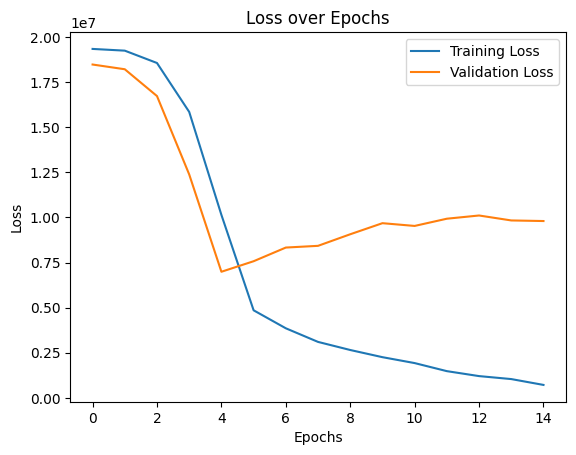

In [94]:
# Visualizar a perda durante o treinamento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

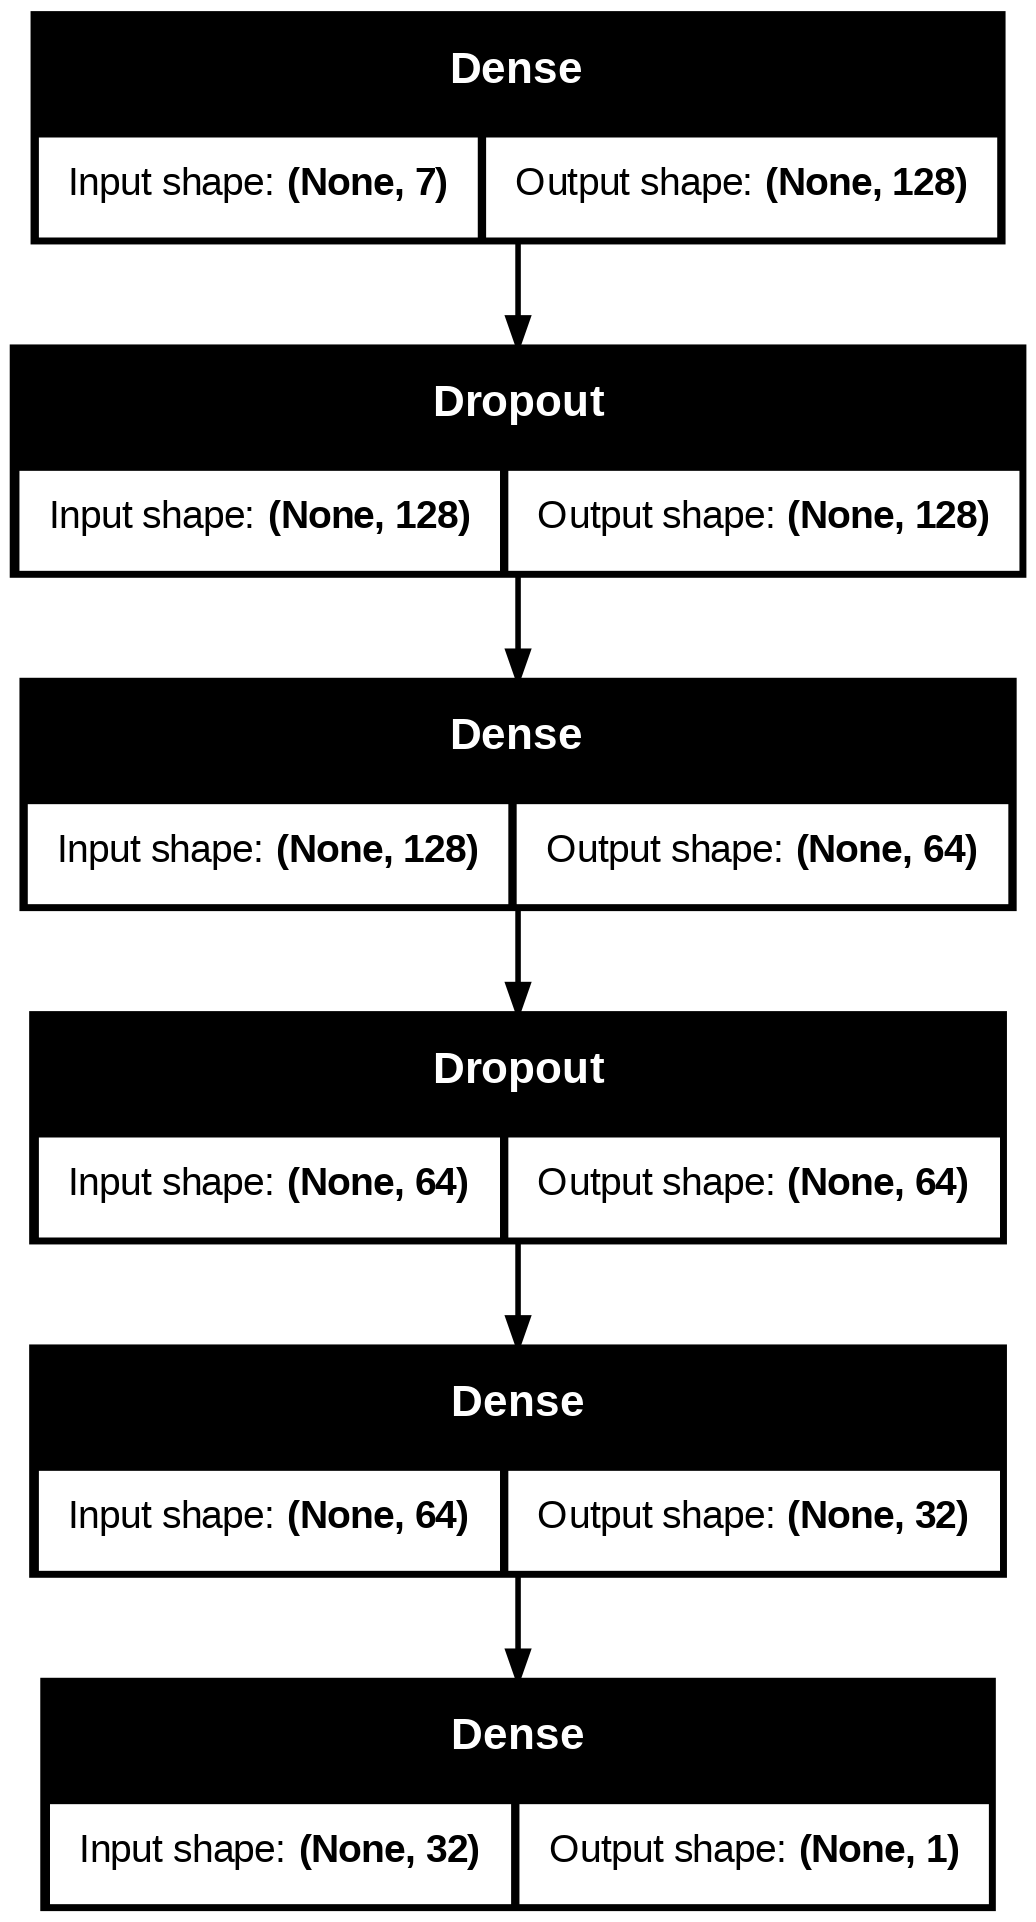

In [95]:
# Exibir o gráfico da rede neural
tf.keras.utils.plot_model(model_neural, show_shapes=True)

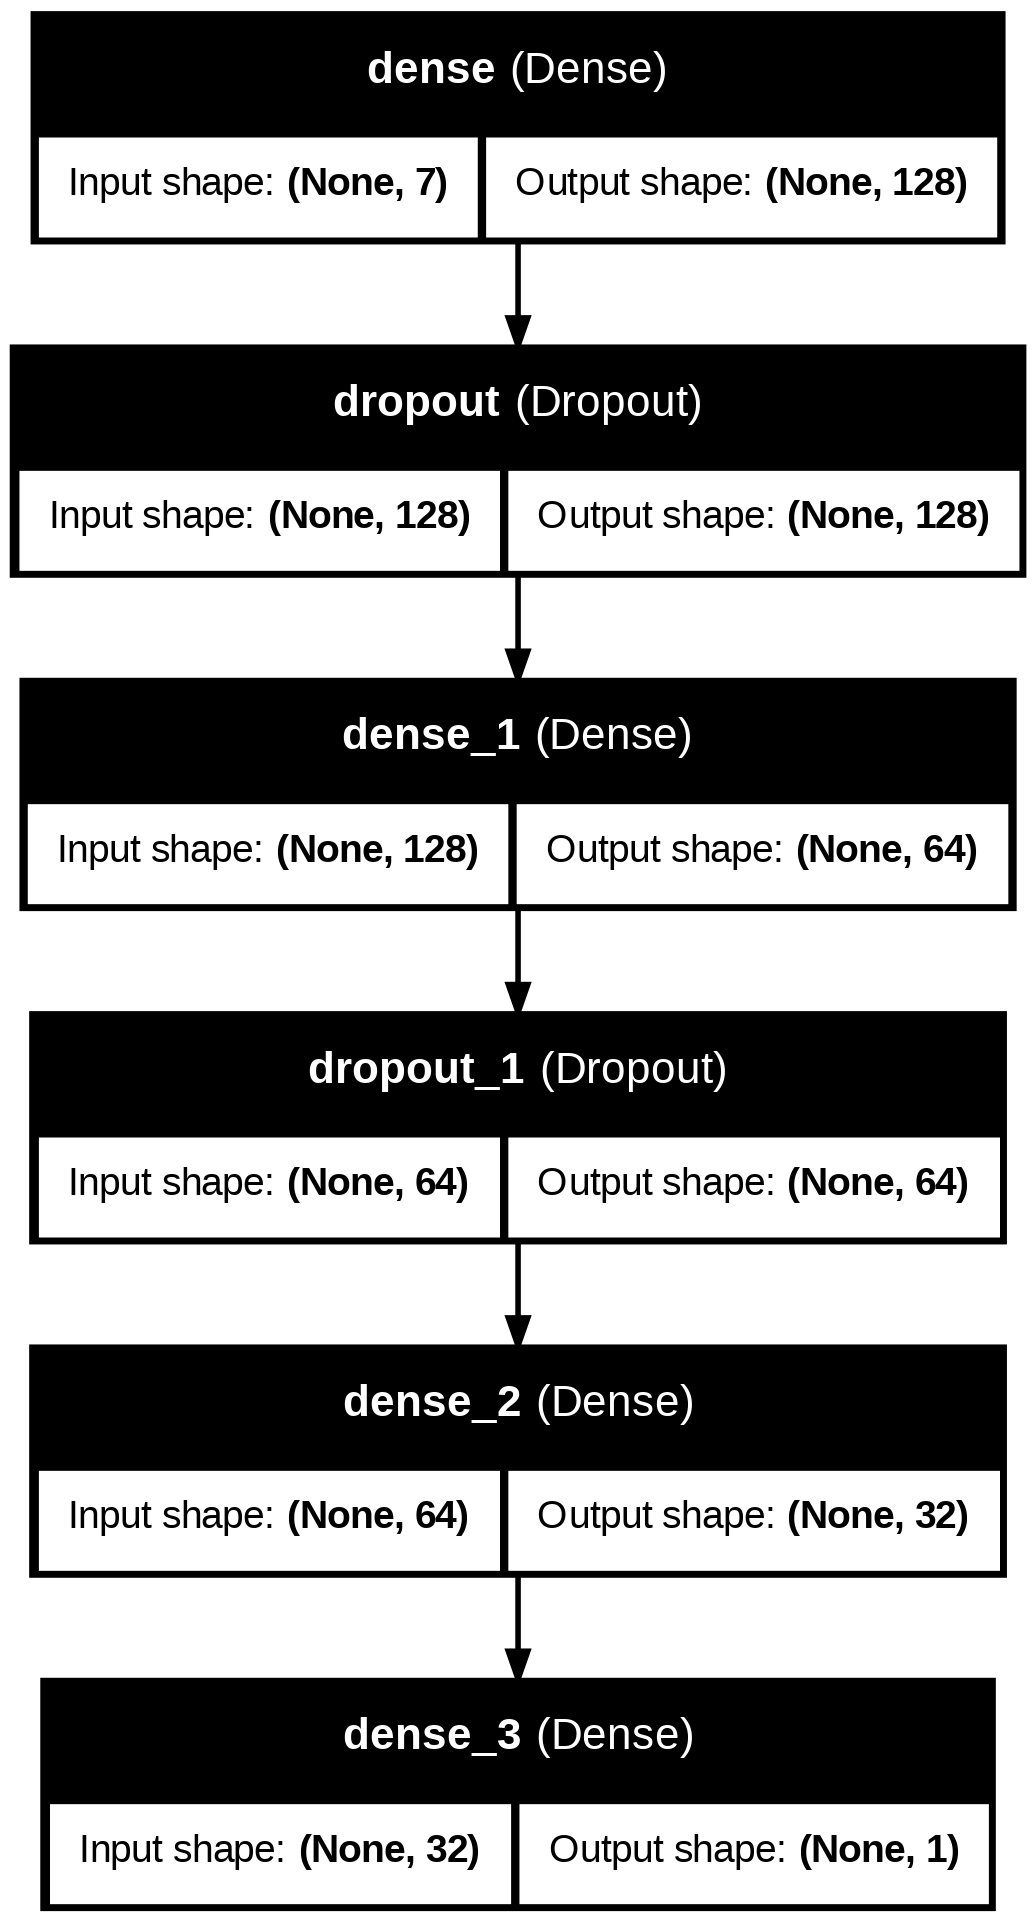

In [96]:
# Visualizar a arquitetura da rede neural
plot_model(model_neural, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [97]:
# Exibir o sumário do modelo treinado
model_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,181 (133.52 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,788 (89.02 KB)

In [98]:
# Simulação de um novo imóvel
new_data = np.array([[200, 4, 3, 3, 2400, 0, 82]])
new_data = scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [99]:
# Fazer a previsão usando o modelo treinado
predicted_rent = model_neural.predict(new_data)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [100]:
# Exibir o preço previsto de aluguel
print(f"Previsão do preço de aluguel do novo imóvel: R$ {predicted_rent:.2f}")

Previsão do preço de aluguel do novo imóvel: R$ 4378.77


<font color="C00000">**Treinamento**

O modelo foi treinado utilizando divisão em treino e teste. Foi utilizado `EarlyStopping` para monitorar a perda de validação e evitar `overftting`.

<font color="C00000"> **Grade de Parâmetros**

Foi definida uma grade de parâmetros com várias camadas e números de neurônios em cada camada, taxa de dropout e função de perda. Foi utilizado o otimizador ADAM.

<font color="C00000"> **Resultado**

O Modelo é altamente preciso e confiável para prever o valor do aluguel de imóveis em São
Paulo, ajudando na tomada de decisões informadas e na estimativa de preços competitivos
de mercado.


# <font color="00295C">6. Conclusão

**● Regressão Linear:**

- Excelente R² e RMSE, mas alta multicolinearidade pode ser uma preocupação.
- Boa escolha se simplificarmos a interpretação e lidarmos com a multicolinearidade.

**● Regressão Logística:**

- Altíssima precisão e recall, excelente generalização para classificação binária.
- Recomendada para categorizações simples de aluguel.

**● Árvore de Decisão:**

- Excelente desempenho com alta precisão, recall e F1-score.
- Boa escolha para capturar interações complexas e não-linearidades nos dados.

**● Rede Neural:**

- Potencial de generalização conforme indicado pela perda decrescente, mas requer mais dados e monitoramento cuidadoso para evitar overfitting.


 ## <font color="00295C"> **Consideração Final**


**Objetivo de categorização:**

O resultado obtido na comparação entre os 2 modelos supervisionados categóricos nos levam a recomendar
pela performance e qualidade dos indicadores o modelo árvore de decisão. O modelo de árvore apresenta
mais categorias do que o modelo regressão logística.

**Objetivo de precificação:**

O resultado obtido na comparação entre os 2 modelos supervisionados preditivos nos levaram a recomendar
pela performance e qualidade dos indicadores o modelo regressão Linear. O modelo de regressão linear
apresenta uma performance maior do que a Redes Neurais, que teria uma mais eficiência em problemas
maiores, pois usasse muito processamento onde o problema em questão, de predição de valores de imóveis
não precisa de tanto recurso.
